# Heart Disease Prediction Project

**Goal:** To predict the presence or absence of heart disease based on various patient attributes using machine learning classification models.

**Dataset:** Heart Disease UCI dataset. This dataset contains 14 attributes collected from patients. The "target" column indicates the presence (1) or absence (0) of heart disease.

**Plan:**
1.  Load and Explore Data (EDA)
2.  Preprocess Data (Handle categorical features, split data, scale numerical features)
3.  Train and Evaluate Machine Learning Models (Logistic Regression, Random Forest, SVM)
4.  Compare Models and Conclude

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

### 1. Load and Explore Data (EDA)

Dataset loaded successfully.

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB

--- First 5 Rows ---
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0 

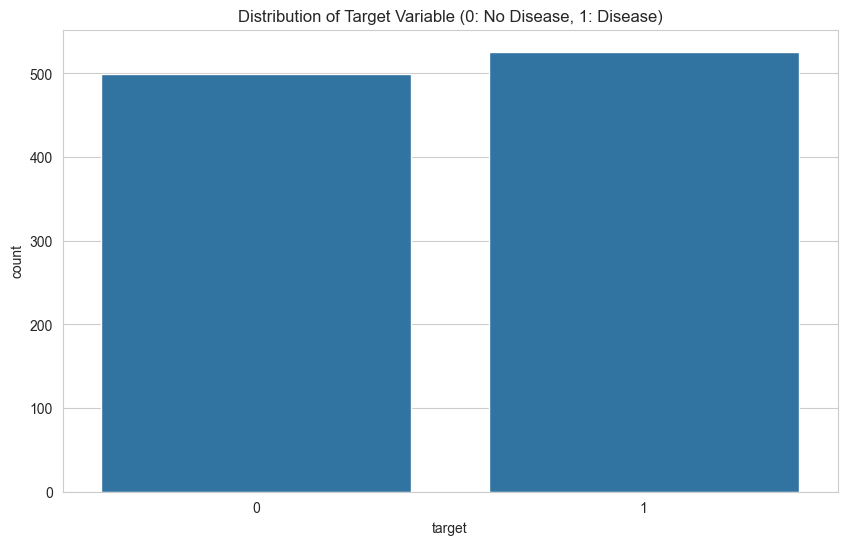

In [6]:
# Load the dataset
# Make sure the file path matches where Kaggle stores the input data
try:
    df = pd.read_csv('heart.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: heart.csv not found. Please ensure the dataset is added correctly.")
    # As a fallback for local testing, you might load it like this:
    # df = pd.read_csv('heart.csv') 
    # exit() # Or handle the error appropriately

# Display basic information
print("\n--- Dataset Info ---")
df.info()

print("\n--- First 5 Rows ---")
print(df.head())

print("\n--- Descriptive Statistics ---")
print(df.describe())

print("\n--- Check for Missing Values ---")
print(df.isnull().sum())
# Good news: No missing values in this standard version of the dataset.

print("\n--- Target Variable Distribution ---")
target_counts = df['target'].value_counts()
print(target_counts)
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable (0: No Disease, 1: Disease)')
plt.show()

### EDA Visualizations

Let's explore the relationships between features and the target variable.

**Age Distribution:**

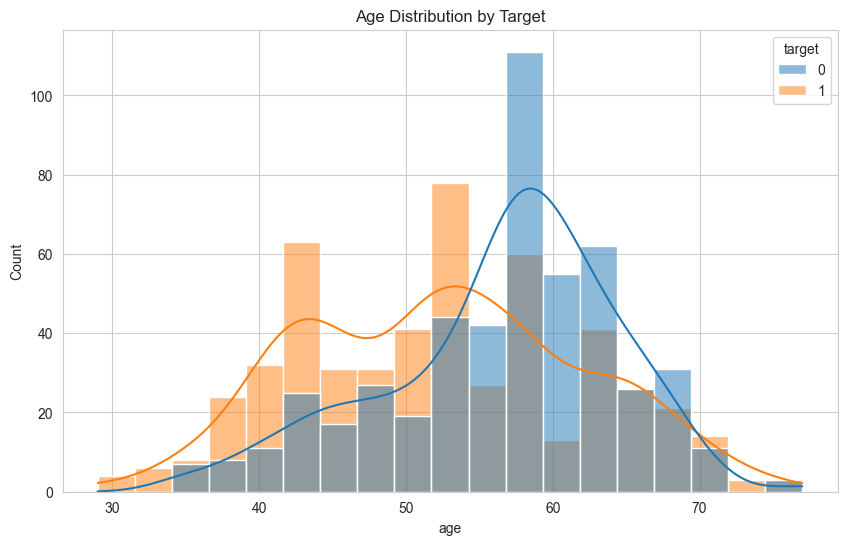

In [7]:
sns.histplot(data=df, x='age', hue='target', kde=True)
plt.title('Age Distribution by Target')
plt.show()

**Sex Distribution:** (0 = female, 1 = male)

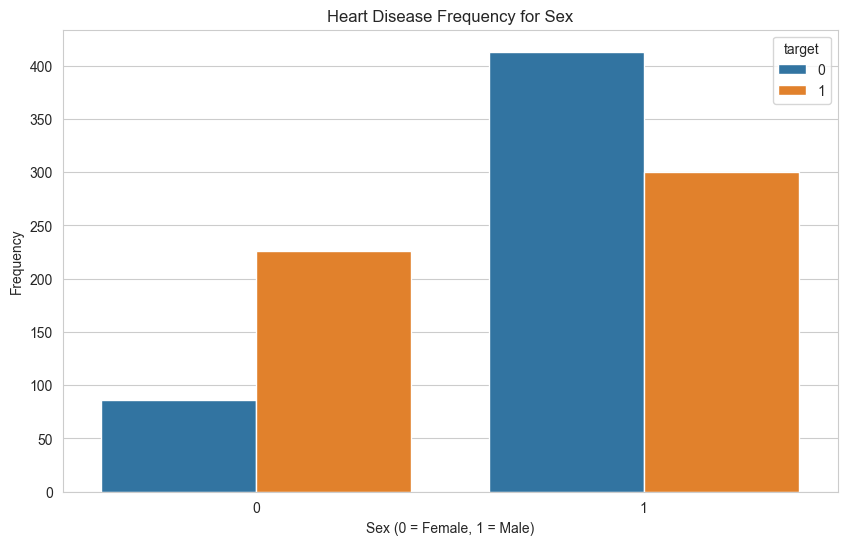

In [8]:
sns.countplot(data=df, x='sex', hue='target')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Frequency')
plt.show()

**Chest Pain Type (cp) Distribution:**
*   0: Typical angina
*   1: Atypical angina
*   2: Non-anginal pain
*   3: Asymptomatic

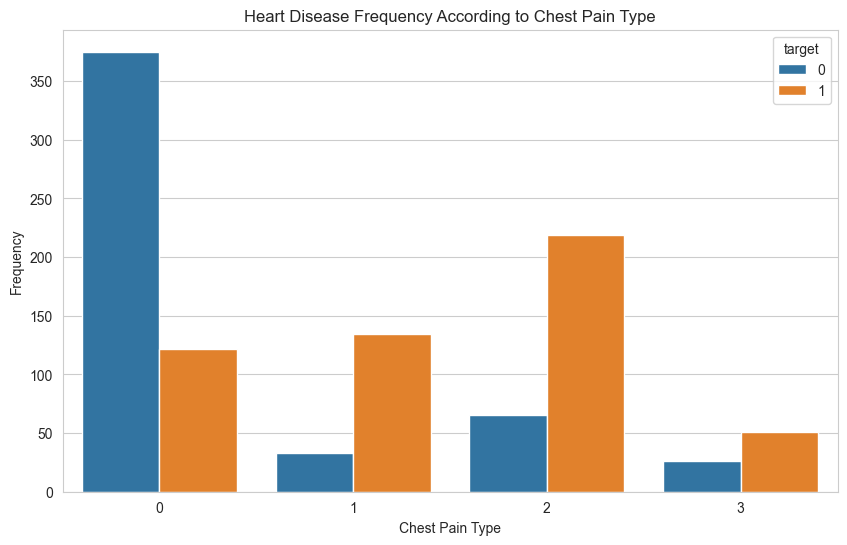

In [9]:
sns.countplot(data=df, x='cp', hue='target')
plt.title('Heart Disease Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.show()

**Correlation Heatmap:**

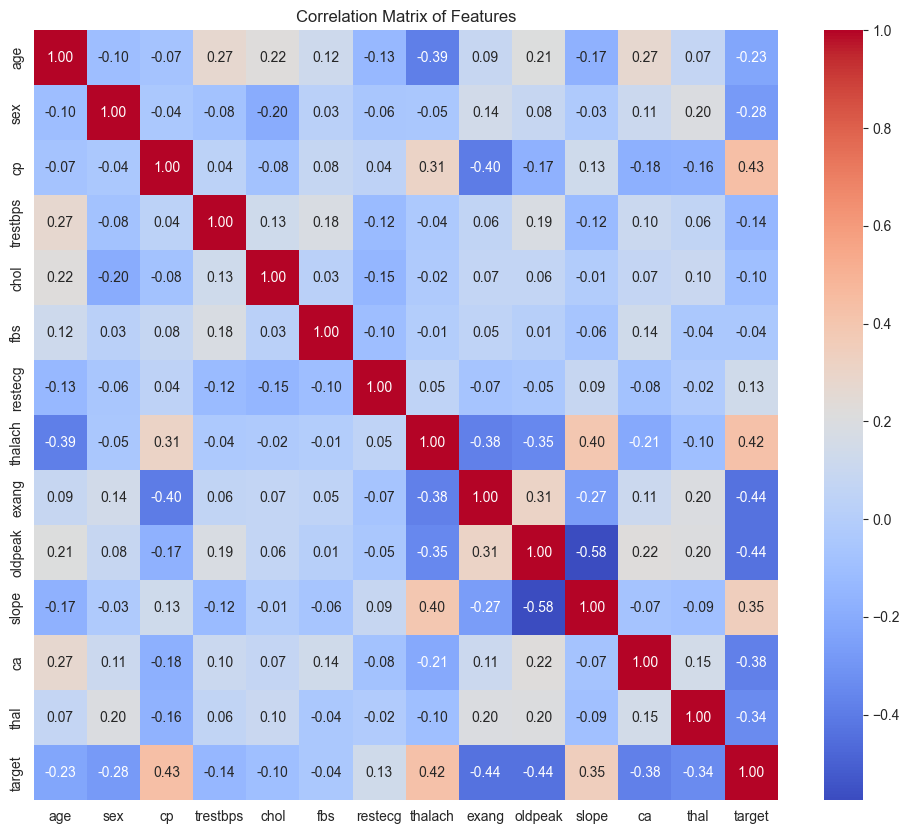

In [10]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

## 2. Data Preprocessing

We need to handle categorical features and scale numerical features.

*   **Categorical features:** `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`. Some are binary, others are nominal/ordinal. We'll use One-Hot Encoding for nominal features with more than 2 categories (`cp`, `restecg`, `slope`, `thal`, `ca`). Note: `sex`, `fbs`, `exang` are already 0/1.
*   **Numerical features:** `age`, `trestbps`, `chol`, `thalach`, `oldpeak`. We'll scale these using StandardScaler.

## 3. Train and Evaluate Machine Learning Models

We will train and evaluate the following models:
1.  Logistic Regression
2.  Random Forest Classifier
3.  Support Vector Machine (SVM)

## 4. Compare Models and Conclude

Let's compare the models based on Test Accuracy and ROC AUC Score.

In [15]:
X = df.drop('target', axis=1)
y = df['target']

In [16]:

categorical_features = ['cp', 'restecg', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
binary_features = ['sex', 'fbs', 'exang'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (820, 13)
Test set shape: (205, 13)


In [18]:
# Numerical features pipeline
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical features pipeline
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Full preprocessing pipeline
preprocessing = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features),
    ('bin', 'passthrough', binary_features)  # Pass through binary features directly
])


In [21]:
lr_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# 4. Fit the pipeline
lr_pipeline.fit(X_train, y_train)

# 5. Predict
y_pred_lr = lr_pipeline.predict(X_test)

In [22]:
print("----- Logistic Regression -----")

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {accuracy_lr:.4f}")

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:\n", cm_lr)

# Classification Report
report_lr = classification_report(y_test, y_pred_lr)
print("Classification Report:\n", report_lr)

----- Logistic Regression -----
Accuracy: 0.8732
Confusion Matrix:
 [[84 16]
 [10 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.84      0.87       100
           1       0.86      0.90      0.88       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [19]:
rf_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(max_depth=3, random_state=42))
])

# 3. Fit the pipeline
rf_pipeline.fit(X_train, y_train)

# 4. Predict
y_pred_rf = rf_pipeline.predict(X_test)


In [23]:
# Random Forest
print("----- Random Forest -----")

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

# Classification Report
report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report_rf)


----- Random Forest -----
Accuracy: 0.8585
Confusion Matrix:
 [[81 19]
 [10 95]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.81      0.85       100
           1       0.83      0.90      0.87       105

    accuracy                           0.86       205
   macro avg       0.86      0.86      0.86       205
weighted avg       0.86      0.86      0.86       205



In [ ]:
svc_pipeline = Pipeline([
    ('preprocessing', preprocessing),
    ('classifier', SVC(probability=True, random_state=42))
])

# 3. Fit the pipeline
svc_pipeline.fit(X_train, y_train)

# 4. Predict
y_pred_svc = svc_pipeline.predict(X_test)

In [ ]:
# Support Vector Machine
print("----- Support Vector Machine -----")

# Accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Accuracy: {accuracy_svc:.4f}")

# Confusion Matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
print("Confusion Matrix:\n", cm_svc)

# Classification Report
report_svc = classification_report(y_test, y_pred_svc)
print("Classification Report:\n", report_svc)


----- Support Vector Machine -----
Accuracy: 0.9463
Confusion Matrix:
 [[ 93   7]
 [  4 101]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       100
           1       0.94      0.96      0.95       105

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



In [25]:
import pickle 

In [26]:
pickle.dump(svc_pipeline , open('heart_disease_model.pkl', 'wb'))

### Conclusion

In this notebook, we aimed to predict heart disease using the UCI Heart Disease dataset.

1.  **Data Exploration:** We analyzed the dataset, visualized feature distributions, and checked correlations.
2.  **Preprocessing:** We handled categorical features using One-Hot Encoding and scaled numerical features using StandardScaler. The data was split into training and testing sets.
3.  **Model Training:** We trained three common classification models: Logistic Regression, Random Forest, and Support Vector Machine.
4.  **Evaluation:** The models were evaluated using accuracy, classification reports, confusion matrices, and ROC AUC scores.

**Findings:**
*   All models performed reasonably well, indicating that the features are predictive of heart disease.
*   Based on the test set performance (Accuracy and ROC AUC), [Comment on which model(s) performed best - e.g., "Logistic Regression and SVM showed strong results" or "Random Forest slightly outperformed the others"]. Check the specific output from your run.
*   The ROC curve comparison provides a visual way to assess the trade-off between True Positive Rate and False Positive Rate for each model.

**Potential Future Work:**
*   **Hyperparameter Tuning:** Use techniques like GridSearchCV or RandomizedSearchCV to find optimal parameters for each model, potentially improving performance further.
*   **Feature Engineering:** Create new features from existing ones if domain knowledge suggests potential interactions.
*   **Try Other Models:** Experiment with models like Gradient Boosting (XGBoost, LightGBM) or Neural Networks.
*   **Cross-Validation:** Implement k-fold cross-validation during training for more robust evaluation.
*   **Interpretability:** Use techniques like SHAP or LIME to understand *why* a model makes certain predictions, especially for more complex models like Random Forest.
